# Related Variables

## Setup the notebook

In [1]:
from statsmodels.stats import weightstats as ws
from pyou.pandasloader import PandasLoader
from pyou.stats import sampling
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pdloader = PandasLoader()

## Association between two continuous variables

### Example: Road vs. map distance

In [3]:
# get data
distance = pdloader.get('roadmap')
distance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Road    20 non-null     float64
 1   Map     20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


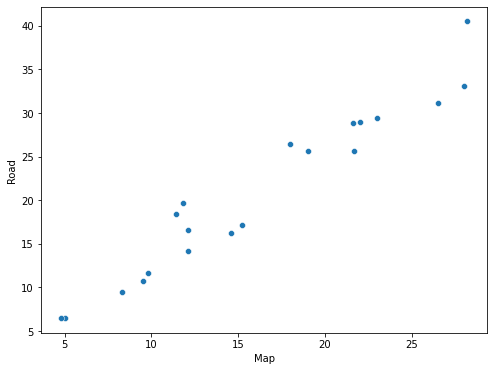

In [4]:
# plot the data
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=distance, x='Map', y='Road')
plt.show()

In [5]:
# get new statsmodels object
dsw = ws.DescrStatsW(distance[['Road', 'Map']])

In [6]:
def cov(x: pd.Series, y: pd.Series) -> float:
    resx = pd.Series(x - x.mean())
    resy = pd.Series(y - y.mean())
    res = resx*resy
    size = resx.size
    # num = pd.Series((x - x.mean())*(y - y.mean())).sum()
    return 1/(size-1) * res.sum()

In [7]:
road, map_ = distance['Road'], distance['Map']

In [8]:
cov(road, map_)

68.33826315789473

In [9]:
distance["subx"] = distance["Road"] - distance["Road"].mean()
distance["suby"] = distance["Map"] - distance["Map"].mean()

In [10]:
distance["Prod"] = distance["subx"]*distance["suby"]
num = distance["Prod"].sum()
num

1298.427

In [11]:
paired = sampling.PairedSamples.from_pandas(distance, ["Road", "Map"])

In [14]:
paired.cov

68.33826315789473

In [13]:
# get covariance
dsw.cov

array([[87.754475, 64.92135 ],
       [64.92135 , 51.1421  ]])